# Prepare Functions
Functions to create:
- splitting into train, validate, test
- scale train, validate, test
- create clusters with kmeans

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.set_option("display.max_colwidth", 10000)

In [4]:
df = pd.read_csv('hiphop_sample.csv')

In [6]:
df.head(5)

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_date,popularity
0,Snoop Dogg,The Best Of Snoop Dogg,Bitch Please,1YrHyDbH17btvI2rFTkbCQ,0.863,0.771,7,-2.770,1,0.1900,0.00000,0.2880,0.812,95.029,234733,4,2005-01-01,52.0
1,The Game,The Documentary,How We Do,6mZcNu9i8uhOYMiEAyEx81,0.862,0.648,4,-7.401,0,0.2510,0.00000,0.0332,0.637,98.012,235533,4,2005,0.0
2,Waka Flocka Flame,No Hands (feat. Roscoe Dash & Wale),No Hands (feat. Roscoe Dash & Wale),6GgPsuz0HEO0nrO2T0QhDv,0.760,0.595,1,-6.366,1,0.0391,0.00000,0.2410,0.361,131.497,263773,4,2010-09-06,58.0
3,Kanye West,My Beautiful Dark Twisted Fantasy,Gorgeous,1yhQGEykn7ZTNLwcIjOAwZ,0.582,0.737,1,-3.477,0,0.0356,0.00008,0.1810,0.122,91.914,357653,4,2010-01-01,0.0
4,JAY-Z,The Hits Collection Volume One [International Version (Explicit)],99 Problems,4HsL5A46wa0O2jQ0ngj3H7,0.478,0.955,6,-0.905,0,0.3800,0.00000,0.0599,0.505,87.522,235467,4,2010-11-22,38.0


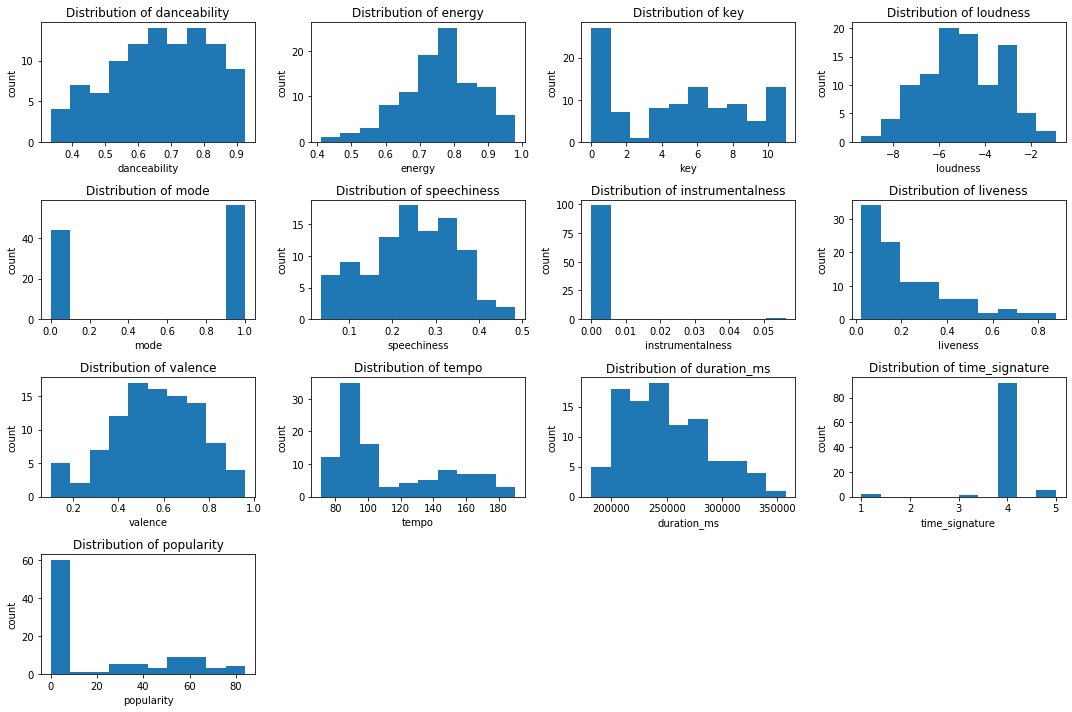

In [29]:
x = 1
plt.figure(figsize=(15,10))
for column in df.describe().columns:
    plt.subplot(4,4,x)
    plt.hist(df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('count')
    x += 1
    
plt.tight_layout()

## Convert duration_ms from miliseconds to seconds
- seconds = milliseconds ÷ 1,000
- maybe another column for minutes
    - minutes = seconds ÷ 60

In [34]:
df['duration_seconds'] = df.duration_ms / 1_000

In [35]:
df['duration_minutes'] = df.duration_seconds / 60

In [37]:
df.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_date,popularity,duration_seconds,duration_minutes
0,Snoop Dogg,The Best Of Snoop Dogg,Bitch Please,1YrHyDbH17btvI2rFTkbCQ,0.863,0.771,7,-2.770,1,0.1900,0.00000,0.2880,0.812,95.029,234733,4,2005-01-01,52.0,234.733,3.912217
1,The Game,The Documentary,How We Do,6mZcNu9i8uhOYMiEAyEx81,0.862,0.648,4,-7.401,0,0.2510,0.00000,0.0332,0.637,98.012,235533,4,2005,0.0,235.533,3.925550
2,Waka Flocka Flame,No Hands (feat. Roscoe Dash & Wale),No Hands (feat. Roscoe Dash & Wale),6GgPsuz0HEO0nrO2T0QhDv,0.760,0.595,1,-6.366,1,0.0391,0.00000,0.2410,0.361,131.497,263773,4,2010-09-06,58.0,263.773,4.396217
3,Kanye West,My Beautiful Dark Twisted Fantasy,Gorgeous,1yhQGEykn7ZTNLwcIjOAwZ,0.582,0.737,1,-3.477,0,0.0356,0.00008,0.1810,0.122,91.914,357653,4,2010-01-01,0.0,357.653,5.960883
4,JAY-Z,The Hits Collection Volume One [International Version (Explicit)],99 Problems,4HsL5A46wa0O2jQ0ngj3H7,0.478,0.955,6,-0.905,0,0.3800,0.00000,0.0599,0.505,87.522,235467,4,2010-11-22,38.0,235.467,3.924450


## Lower Case All Text Features

In [46]:
df.artist = df.artist.str.lower()

In [48]:
df.album = df.album.str.lower()

In [50]:
df.track_name = df.track_name.str.lower()

## is_featured_artist column?

In [52]:
df['is_featured_artist'] = df.track_name.str.contains('feat')

In [53]:
df.is_featured_artist.value_counts()

False    89
True     11
Name: is_featured_artist, dtype: int64

## Split DF
- using sklearn split functions to split df into 70% train, 20% validate, 10% test

In [7]:
# function to split data into train, validate, and test
def split_df(df):

    '''
    Splits dataframe into train, validate, and test - 70%, 20%, 10% respectively.
    Prints out the percentage shape and row/column shape of the split dataframes.
    Returns train, validate, test.
    '''

    # Import to use split function, can only split two at a time
    from sklearn.model_selection import train_test_split

    # First, split into train + validate together and test by itself
    # Test will be %10 of the data, train + validate is %70 for now
    # Set random_state so we can reproduce the same 'random' data
    train_validate, test = train_test_split(df, test_size = .10, random_state = 666)

    # Second, split train + validate into their seperate dataframes
    # Train will be %70 of the data, Validate will be %20 of the data
    # Set random_state so we can reproduce the same 'random' data
    train, validate = train_test_split(train_validate, test_size = .22, random_state = 666)

    # These two print functions allow us to ensure the date is properly split
    # Will print the shape of each variable when running the function
    print("train shape: ", train.shape, ", validate shape: ", validate.shape, ", test shape: ", test.shape)

    # Will print the shape of each variable as a percentage of the total data set
    # Variable to hold the sum of all rows (total observations in the data)
    total = df.count()[0]
    
    #calculating percentages of the split df to the original df
    train_percent = round(((train.shape[0])/total),2) * 100
    validate_percent = round(((validate.shape[0])/total),2) * 100
    test_percent = round(((test.shape[0])/total),2) * 100
    
    print("\ntrain percent: ", train_percent, ", validate percent: ", validate_percent, 
            ", test percent: ", test_percent)

    return train, validate, test

In [8]:
train, validate, test = split_df(df)

train shape:  (70, 18) , validate shape:  (20, 18) , test shape:  (10, 18)

train percent:  70.0 , validate percent:  20.0 , test percent:  10.0


## Scale the Data
- MinMaxScaler
    - a linear scaling method that transforms our features such that the range is between 0 and 1
    
- Standard
    - standardization is a linear transformation of our data such that is looks like the standard normal distribution
    - it will have a mean of 0 and a standard deviation of 1
    - scales and then centers
    
- RobustScaler
    - another linear transformation more robust to outliers
    
### Function to scale:
- takes train, validate, and test and returns the three scaled versions
- parameter for predict drops the specified predictive variable in the df, in this case popularity
- parameter for scaler specifies to use MinMax, Standard, or Robust Scaler

In [9]:
def scale_data(train, validate, test, predict, scaler):

    '''
    Scales a df based on scaler chosen: 'MinMax', 'Standard', or 'Robust'. 
    Needs three dfs, train, validate, and test. Fits the scaler object to train 
    only, transforms on all 3. Returns the three dfs scaled.
    '''
    
    import sklearn.preprocessing
    
    # removing predictive feature
    X_train = train.drop(predict, axis=1)
    X_validate = validate.drop(predict, axis=1)
    X_test = test.drop(predict, axis=1)
    
    if scaler == 'MinMax':

        # create scaler object for MinMax Scaler
        scaler = sklearn.preprocessing.MinMaxScaler()
        
    elif scaler == 'Standard':
        
        # create scaler object for Standard Scaler
        scaler = sklearn.preprocessing.StandardScaler()
        
    elif scaler == 'Robust':
        
        # create scaler object for Robust Scaler
        scaler = sklearn.preprocessing.StandardScaler()
        
    # Note that we only call .fit with the training data,
    # but we use .transform to apply the scaling to all the data splits.
    scaler.fit(X_train)

    # transforming all three dfs with the scaler object
    # this turns it into an array
    X_train_scaled = scaler.transform(X_train)
    X_validate_scaled = scaler.transform(X_validate)
    X_test_scaled = scaler.transform(X_test)

    # converting scaled array back to df
    # first by converting to a df, it will not have the original index and column names
    X_train_scaled = pd.DataFrame(X_train_scaled)
    X_validate_scaled = pd.DataFrame(X_validate_scaled)
    X_test_scaled = pd.DataFrame(X_test_scaled)
        
    # setting index to original dfs
    X_train_scaled.index = X_train.index
    X_validate_scaled.index = X_validate.index
    X_test_scaled.index = X_test.index
        
    # renaming columns to original dfs
    X_train_scaled.columns = X_train.columns
    X_validate_scaled.columns = X_validate.columns
    X_test_scaled.columns = X_test.columns

    return X_train_scaled, X_validate_scaled, X_test_scaled

In [10]:
train.describe().columns.to_list()

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'popularity']

In [11]:
# testing scaling on numeric columns
columns = train.describe().columns.to_list()
train = train[columns]
validate = validate[columns]
test = test[columns]

In [12]:
train

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity
25,0.866,0.630,9,-4.795,0,0.1720,0.000000,0.0360,0.750,82.044,257640,4,0.0
26,0.476,0.810,4,-3.414,0,0.2650,0.000000,0.5680,0.642,83.309,228827,4,0.0
82,0.374,0.888,8,-3.197,1,0.1200,0.000000,0.2020,0.365,148.828,319940,4,61.0
56,0.608,0.875,7,-5.642,1,0.2310,0.000000,0.1250,0.589,163.443,257600,4,0.0
98,0.673,0.766,11,-5.018,1,0.3490,0.000000,0.0563,0.382,148.113,320893,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.725,0.708,6,-5.210,1,0.2190,0.000000,0.0887,0.585,90.596,280867,4,0.0
48,0.518,0.890,2,-4.978,1,0.3510,0.000090,0.4740,0.521,99.471,181680,4,0.0
44,0.784,0.498,1,-6.977,1,0.0533,0.000001,0.2240,0.418,143.960,201587,4,0.0
38,0.700,0.598,2,-7.783,1,0.1140,0.000000,0.1110,0.594,160.041,228453,4,0.0


In [11]:
X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(train, validate, test, 'popularity','MinMax')

In [12]:
X_train_scaled

,disc_number,duration_ms,track_number
2,0.0,0.000000,0.000000
6,0.0,0.059469,0.000000
4,0.0,0.347861,1.000000
0,0.0,1.000000,0.500000
1,0.0,0.557499,0.000000
8,0.0,0.195823,1.000000
9,0.0,0.609115,0.833333


# Cluster Function
- create clusters using kmeans modeling
- make into function that can be used on any features chosen throughout the project pipeline process
- with small amount of data, function works with train
    - not enough observations to create clusters on validate and test
    - commenting out validate and test for now

In [13]:
def create_clusters(X_train_scaled, X_validate_scaled, X_test_scaled, features, n, cluster_name):
    
    '''
    Create clusters based on features specified. n is amount of groups within the cluster.
    Best when used on scaled dfs. Returns dfs with dummy variables of clusters appended.
    '''
    
    from sklearn.cluster import KMeans

    X = X_train_scaled[features]
    Y = X_validate_scaled[features]
    Z = X_test_scaled[features]
    
    # create object with clusters chosen by n parameter
    kmeans = KMeans(n_clusters=n, random_state = 666)

    # fit to train only and the features chosen
    kmeans.fit(X)
    
    # add a column to the dfs of the prediction of cluster group
    X_train_scaled[cluster_name] = kmeans.predict(X)
    X_validate_scaled[cluster_name] = kmeans.predict(Y)
    X_test_scaled[cluster_name] = kmeans.predict(Z)
    
    
    # naming the cluster groups by cluster name plus numbers 1 through n for each group
    columns = []
    for x in range(1, n+1):
        columns.append(f'{cluster_name}_{x}')
    
    
    # create dataframe of dummy variables of cluster group created for each train, validate, test
    # train cluster dummy variables
    dummies = pd.get_dummies(X_train_scaled[cluster_name])
    dummies.columns = columns

    # validate cluster dummy variables
    dummies2 = pd.get_dummies(X_validate_scaled[cluster_name])
    dummies2.columns = columns

    # test cluster dummy variables
    dummies3 = pd.get_dummies(X_test_scaled[cluster_name])
    dummies3.columns = columns
    
    # add cluster dummy variables to scaled df
    # adding train cluster dummies to train scaled df
    X_train_scaled = pd.concat([X_train_scaled,dummies], axis=1)
    
    # adding validate cluster dummies to validate scaled df
    X_validate_scaled = pd.concat([X_validate_scaled,dummies2], axis=1)
    
    # adding test cluster dummies to test scaled df
    X_test_scaled = pd.concat([X_test_scaled,dummies3], axis=1)

    return X_train_scaled, X_validate_scaled, X_test_scaled

In [14]:
# testing on sample df
features = ['disc_number','duration_ms']
cluster_name = 'disk_number_duration_cluster'
n=4

create_clusters(X_train_scaled, X_validate_scaled, X_test_scaled, features, n, cluster_name)

,disc_number,duration_ms,track_number,disk_number_duration_cluster,disk_number_duration_cluster_1,disk_number_duration_cluster_2,disk_number_duration_cluster_3,disk_number_duration_cluster_4
2,0.0,0.000000,0.000000,3,0,0,0,1
6,0.0,0.059469,0.000000,3,0,0,0,1
4,0.0,0.347861,1.000000,0,1,0,0,0
0,0.0,1.000000,0.500000,2,0,0,1,0
1,0.0,0.557499,0.000000,1,0,1,0,0
8,0.0,0.195823,1.000000,0,1,0,0,0
9,0.0,0.609115,0.833333,1,0,1,0,0
